In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from tensorflow.keras import regularizers , callbacks
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM, Bidirectional, Dense
from tensorflow.keras.callbacks import EarlyStopping, Callback
import time

In [2]:
# data = pd.read_csv('C:/Optimal Control/optitrap_alg_final/Levitator_Data/new_concatenated_data_7_theta.csv')
data = pd.read_csv('C:/Optimal Control/optitrap_alg_final/Levitator_Data/mirror_image/data_mirror_new_theta.csv')


In [3]:
input_train =data[['traps_y','traps_z','theta']].values
output_train =data[['measured_y','measured_z','theta']].values

from sklearn.preprocessing import StandardScaler

# scaler1 = StandardScaler()

# input_train_scaled = scaler1.fit_transform(input_train)
# output_train_scaled = scaler1.transform(output_train)

input_train_scaled = input_train
output_train_scaled = output_train

input_train_scaled = input_train_scaled.reshape((input_train_scaled.shape[0], 1, input_train_scaled.shape[1]))

# X_train, X_test, y_train, y_test = train_test_split(input_train_scaled, output_train_scaled, test_size=0.15, random_state=42)


indices = np.arange(input_train.shape[0])

X_train, X_test, y_train, y_test, train_indices,test_indices = train_test_split(
    input_train_scaled, output_train_scaled, indices, test_size=0.30, random_state=42)


model1 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(1, 3), return_sequences=False),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(output_train.shape[1])
])

model1.compile(loss='mean_squared_error', optimizer='adam')

early_stopping_callback = callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

start_time_training = time.time()
history = model1.fit(X_train, y_train, epochs=700, verbose=1, validation_split=0.1, callbacks=[early_stopping_callback])
end_time_training = time.time()
training_time = end_time_training - start_time_training

start_time_inference = time.time()
predictions = model1.predict(X_test)
end_time_inference = time.time()



Epoch 1/700
195/195 [==============================] - 2s 3ms/step - loss: 1080.4636 - val_loss: 4.0893
Epoch 2/700
195/195 [==============================] - 0s 2ms/step - loss: 3.0007 - val_loss: 1.7458
Epoch 3/700
195/195 [==============================] - 0s 2ms/step - loss: 1.1232 - val_loss: 0.6101
Epoch 4/700
195/195 [==============================] - 0s 2ms/step - loss: 0.5519 - val_loss: 0.4536
Epoch 5/700
195/195 [==============================] - 0s 2ms/step - loss: 0.4674 - val_loss: 0.4681
Epoch 6/700
195/195 [==============================] - 0s 2ms/step - loss: 0.4455 - val_loss: 0.4190
Epoch 7/700
195/195 [==============================] - 0s 2ms/step - loss: 0.4266 - val_loss: 0.4003
Epoch 8/700
195/195 [==============================] - 0s 2ms/step - loss: 0.4060 - val_loss: 0.4056
Epoch 9/700
195/195 [==============================] - 0s 2ms/step - loss: 0.4031 - val_loss: 0.3793
Epoch 10/700
195/195 [==============================] - 0s 2ms/step - loss: 0.3842 - val

195/195 [==============================] - 0s 2ms/step - loss: 0.1940 - val_loss: 0.1540
Epoch 82/700
195/195 [==============================] - 0s 2ms/step - loss: 0.2037 - val_loss: 0.1878
Epoch 83/700
195/195 [==============================] - 0s 2ms/step - loss: 0.1753 - val_loss: 0.1850
Epoch 84/700
195/195 [==============================] - 0s 2ms/step - loss: 0.1908 - val_loss: 0.2197
Epoch 85/700
195/195 [==============================] - 0s 2ms/step - loss: 0.1798 - val_loss: 0.2036
Epoch 86/700
195/195 [==============================] - 0s 2ms/step - loss: 0.1726 - val_loss: 0.1536
Epoch 87/700
195/195 [==============================] - 0s 2ms/step - loss: 0.1892 - val_loss: 0.1984
Epoch 88/700
195/195 [==============================] - 0s 2ms/step - loss: 0.1786 - val_loss: 0.1638
Epoch 89/700
195/195 [==============================] - 0s 2ms/step - loss: 0.1852 - val_loss: 0.1641
Epoch 90/700
195/195 [==============================] - 0s 2ms/step - loss: 0.1589 - val_loss: 

Epoch 161/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0974 - val_loss: 0.0684
Epoch 162/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0678 - val_loss: 0.0650
Epoch 163/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0787 - val_loss: 0.0421
Epoch 164/700
195/195 [==============================] - 1s 3ms/step - loss: 0.0839 - val_loss: 0.1970
Epoch 165/700
195/195 [==============================] - 1s 3ms/step - loss: 0.0870 - val_loss: 0.0539
Epoch 166/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0835 - val_loss: 0.0909
Epoch 167/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0854 - val_loss: 0.0707
Epoch 168/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0884 - val_loss: 0.0600
Epoch 169/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0691 - val_loss: 0.0435
Epoch 170/700
195/195 [==============================] - 0s 2ms/step - lo

195/195 [==============================] - 0s 2ms/step - loss: 0.0692 - val_loss: 0.0926
Epoch 241/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0761 - val_loss: 0.0764
Epoch 242/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0654 - val_loss: 0.0621
Epoch 243/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0790 - val_loss: 0.0395
Epoch 244/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0613 - val_loss: 0.0623
Epoch 245/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0669 - val_loss: 0.0639
Epoch 246/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0655 - val_loss: 0.0907
Epoch 247/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0707 - val_loss: 0.0508
Epoch 248/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0667 - val_loss: 0.0387
Epoch 249/700
195/195 [==============================] - 0s 2ms/step - loss: 0.0633 - v

In [4]:
inference_time = end_time_inference - start_time_inference
print(f'Training Time: {training_time:.2f} seconds')
print(f'Inference Time: {inference_time:.4f} seconds per sample')

Training Time: 119.16 seconds
Inference Time: 0.3226 seconds per sample


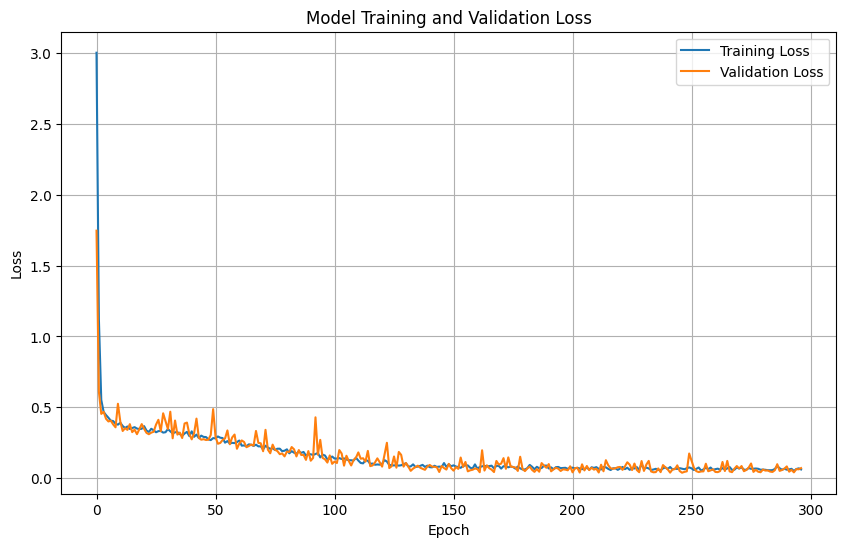

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


loss_values_from_third_epoch = history.history['loss'][1:]
val_loss_values = history.history['val_loss'][1:]

# Now plot starting from the 3rd epoch

plt.plot(loss_values_from_third_epoch, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

plt.savefig('Model Training and Validation Loss.png', format='png')
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)


print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.03909050096157217
Mean Absolute Error: 0.12807103376266663
R-squared: 0.9997725297510076


In [7]:
# predictions_inverse_scaled = scaler1.inverse_transform(predictions)
# predictions_df = pd.DataFrame(predictions_inverse_scaled)
# predictions_df
predictions_df = pd.DataFrame(predictions)
predictions_df

,0,1,2
0,-39.239689,102.499779,2.652175
1,-41.620956,111.622948,2.960178
2,-25.899137,120.345055,4.766653
3,35.005047,132.769043,0.401921
4,-16.982073,111.810265,4.958507
...,...,...,...
2962,27.338179,138.451843,0.569910
2963,-26.454809,120.954697,4.749209
2964,40.345196,113.759476,6.194833
2965,-34.615059,113.183289,1.777264


In [8]:


predictions_df.columns = ['0','1','2']  # Clear any existing column names
predictions_df.columns = [ 'measured_y', 'measured_z','theta']

# predictions_df.columns = ['0','1']  # Clear any existing column names
# predictions_df.columns = ['measured_y', 'measured_z']

In [9]:
# bead_x = data.loc[test_indices, 'bead_x'].values
reference_y = data.loc[test_indices, 'reference_y'].values
reference_z = data.loc[test_indices, 'reference_z'].values


lookup_table = pd.DataFrame({
    'theta': predictions_df['theta'],
#     'measured_x': predictions_df['measured_x'],
    'measured_y': predictions_df['measured_y'],
    'measured_z': predictions_df['measured_z'],
#     'traps_x': input_train[test_indices, 1],
    'traps_y': input_train[test_indices, 0],
    'traps_z': input_train[test_indices, 1],
#     'simulated_x': bead_x,
    'reference_y': reference_y,
    'reference_z': reference_z,
})
lookup_table

,theta,measured_y,measured_z,traps_y,traps_z,reference_y,reference_z
0,2.652175,-39.239689,102.499779,-43.858305,103.682749,-43.841686,103.360943
1,2.960178,-41.620956,111.622948,-43.110879,112.076170,-42.775556,111.927768
2,4.766653,-25.899137,120.345055,-27.302437,117.937062,-28.508862,117.895477
3,0.401921,35.005047,132.769043,34.222157,133.354134,35.885862,133.557822
4,4.958507,-16.982073,111.810265,-17.635968,109.918091,-18.464252,109.732995
...,...,...,...,...,...,...,...
2962,0.569910,27.338179,138.451843,25.845103,138.351896,27.183214,138.653718
2963,4.749209,-26.454809,120.954697,-27.901015,118.520598,-29.128234,118.490183
2964,6.194833,40.345196,113.759476,39.792526,113.610067,41.502822,113.538425
2965,1.777264,-34.615059,113.183289,-33.884107,113.754279,-35.293491,113.652881


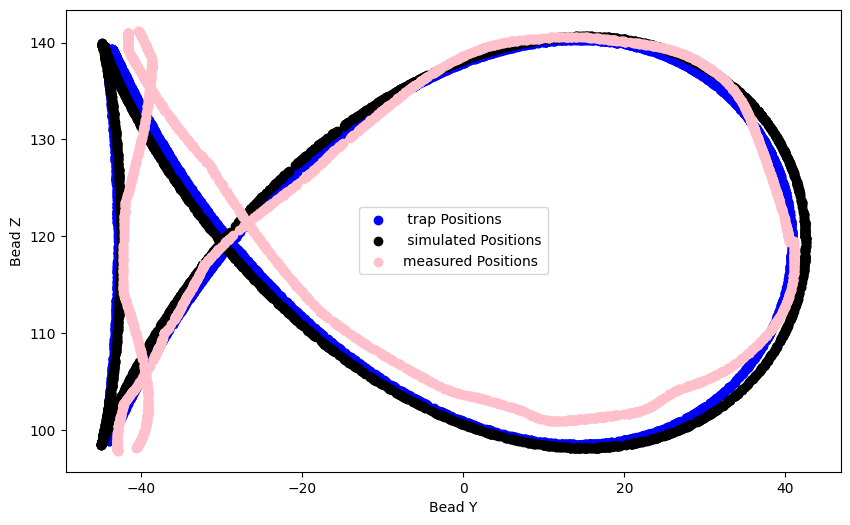

In [32]:

# Plot the predictions vs reference positions
plt.figure(figsize=(10, 6))
plt.scatter(lookup_table['traps_y'], lookup_table['traps_z'], color='blue', label=' trap Positions', lw=1)
plt.scatter(lookup_table['reference_y'], lookup_table['reference_z'], color='black', label=' simulated Positions')
plt.scatter(lookup_table['measured_y'], lookup_table['measured_z'], color='pink', label='measured Positions')

plt.xlabel('Bead Y')
plt.ylabel('Bead Z')
plt.legend()
plt.show()

In [33]:

# # Plot the predictions vs reference positions
# plt.figure(figsize=(10, 6))
# plt.scatter(data['traps_y'], data['traps_z'], color='blue', label=' trap Positions', lw=1)
# plt.scatter(data['bead_y'], data['bead_z'], color='black', label=' simulated Positions')
# plt.scatter(data['measured_y'], data['measured_z'], color='pink', label='measured Positions')

# plt.xlabel('Bead Y')
# plt.ylabel('Bead Z')
# plt.legend()
# plt.show()

In [34]:
# theta_lookup=lookup_table.sort_values(by='theta')['theta'].reset_index(drop=True)


In [35]:
# lookup_table = lookup_table.sort_values(by='theta').reset_index(drop=True)
# lookup_table

In [36]:
# change of logic - using theta static and static reference positions calculations

In [10]:
theta_pred = predictions_df.sort_values(by='theta')['theta']
theta_lookup=predictions_df['theta']
theta_lookup

0       2.652175
1       2.960178
2       4.766653
3       0.401921
4       4.958507
          ...   
2962    0.569910
2963    4.749209
2964    6.194833
2965    1.777264
2966    1.426649
Name: theta, Length: 2967, dtype: float32

In [11]:
h_center = tf.constant(0.1194, dtype=tf.float32)
q_y = tf.cos(theta_lookup) - (tf.sin(theta_lookup)**2 / tf.sqrt(tf.constant(2.0, dtype=tf.float32)))
q_z = tf.sin(theta_lookup) * tf.cos(theta_lookup)
bead_y = q_y*42.2
bead_z = (q_z + h_center)*42 +114.40

reference_positions = tf.concat([tf.expand_dims(theta_lookup, axis=1), tf.expand_dims(bead_y, axis=1), tf.expand_dims(bead_z, axis=1)], axis=1)
reference_positions

<tf.Tensor: shape=(2967, 3), dtype=float32, numpy=
array([[  2.652175 , -43.840782 , 101.98799  ],
       [  2.9601784, -42.478817 , 111.96148  ],
       [  4.766653 , -27.463306 , 117.14018  ],
       ...,
       [  6.194833 ,  41.80307  , 115.723274 ],
       [  1.7772645, -37.237015 , 110.98749  ],
       [  1.426649 , -23.162188 , 125.385475 ]], dtype=float32)>

In [39]:
# #checking the range of values for all parameters involved
# plt.figure(figsize=(10, 6))
# plt.scatter(input_nn2[:, 0], input_nn2[:, 1], color='pink', label='Measured Positions (predicted from Model 1)', s=1)
# plt.scatter(reference_positions[:, 1], reference_positions[:, 2], color='blue', label='Calculated Reference Positions', s=1)
# plt.scatter(output_nn2[:, 0], output_nn2[:, 1], color='green', label='Actual Traps', s=1)

# plt.title("")
# plt.xlabel('Bead Y')
# plt.ylabel('Bead Z')
# plt.legend()
# plt.grid()

# plt.savefig('Range check for all parameters involved.png', format='png')

# plt.show()


In [12]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Extract and scale input and output data
input_nn2 = lookup_table[['measured_y', 'measured_z', 'theta']].values
output_nn2 = lookup_table[['traps_y', 'traps_z', 'reference_y', 'reference_z',  'theta']].values

# Reshape the data for LSTM input
input_scaled_nn2 = input_nn2.reshape((input_nn2.shape[0], 1, input_nn2.shape[1]))
output_scaled_nn2 = output_nn2

In [13]:


# Split the data into training and testing sets
X_train_nn2, X_test_nn2, y_train_nn2, y_test_nn2 = train_test_split(input_scaled_nn2, output_scaled_nn2, test_size=0.15, random_state=42)

# Define the second model architecture
model2 = Sequential([
    LSTM(64, activation='relu', input_shape=(1, input_nn2.shape[1]), return_sequences=False),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(output_nn2.shape[1])
])

def custom_cost_function(y_true_nn2, y_pred_nn2):
    batch_size = tf.shape(y_pred_nn2)[0]

    # Extract theta and predicted positions from y_pred
    traps_pred = y_pred_nn2[:, 0:2]
    theta_pred = y_pred_nn2[:, 4:5]

    # Reshape to match the input shape for model1
    input_for_nn1 = tf.concat([traps_pred, theta_pred], axis=1)
    input_for_nn1 = tf.expand_dims(input_for_nn1, axis=1)  # Reshape

    # Get predicted bead positions from model1
    predicted_bead_positions = model1(input_for_nn1, training=False)

 
    # Extract true theta from y_true
    theta_lookup = y_true_nn2[:, -1]  

    # Calculate reference_positions_final based on theta
    h_center = tf.constant(0.1194, dtype=tf.float32)
    q_y = tf.cos(theta_lookup) - (tf.sin(theta_lookup)**2 / tf.sqrt(tf.constant(2.0, dtype=tf.float32)))
    q_z = tf.sin(theta_lookup) * tf.cos(theta_lookup)
    bead_y = q_y
    bead_z = (q_z + h_center)

    reference_positions_final = tf.concat([
        tf.expand_dims(bead_y, axis=1),
        tf.expand_dims(bead_z, axis=1),
        tf.expand_dims(theta_lookup, axis=1)
    ], axis=1)

    true_simulated_positions = reference_positions_final[:, :]

    deviation = tf.reduce_mean(tf.reduce_sum(tf.abs(predicted_bead_positions - true_simulated_positions), axis=1))  # Only consider y and z

    return deviation

# Compile and train the model with the custom cost function
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
model2.compile(loss=custom_cost_function, optimizer='adam')



start_time_training = time.time()
history = model2.fit(X_train_nn2, y_train_nn2, epochs=400, verbose=1, validation_split=0.1, callbacks=[early_stopping_callback])
end_time_training = time.time()
training_time = end_time_training - start_time_training

start_time_inference = time.time()
y_pred_nn2 = model2.predict(X_test_nn2)
end_time_inference = time.time()



Epoch 1/400
71/71 [==============================] - 3s 7ms/step - loss: 4.5172 - val_loss: 3.6691
Epoch 2/400
71/71 [==============================] - 0s 3ms/step - loss: 3.5851 - val_loss: 3.2986
Epoch 3/400
71/71 [==============================] - 0s 3ms/step - loss: 3.4481 - val_loss: 3.2277
Epoch 4/400
71/71 [==============================] - 0s 4ms/step - loss: 3.3583 - val_loss: 3.1624
Epoch 5/400
71/71 [==============================] - 0s 3ms/step - loss: 3.2814 - val_loss: 3.0724
Epoch 6/400
71/71 [==============================] - 0s 3ms/step - loss: 3.1778 - val_loss: 2.9788
Epoch 7/400
71/71 [==============================] - 0s 3ms/step - loss: 3.1151 - val_loss: 2.8991
Epoch 8/400
71/71 [==============================] - 0s 3ms/step - loss: 3.0160 - val_loss: 2.7524
Epoch 9/400
71/71 [==============================] - 0s 3ms/step - loss: 2.6426 - val_loss: 2.2283
Epoch 10/400
71/71 [==============================] - 0s 3ms/step - loss: 1.9734 - val_loss: 1.4635
Epoch 11/

71/71 [==============================] - 0s 3ms/step - loss: 0.6645 - val_loss: 0.6150
Epoch 84/400
71/71 [==============================] - 0s 3ms/step - loss: 0.6406 - val_loss: 0.6377
Epoch 85/400
71/71 [==============================] - 0s 3ms/step - loss: 0.6739 - val_loss: 0.7249
Epoch 86/400
71/71 [==============================] - 0s 3ms/step - loss: 0.7001 - val_loss: 0.5750
Epoch 87/400
71/71 [==============================] - 0s 3ms/step - loss: 0.6233 - val_loss: 0.5567
Epoch 88/400
71/71 [==============================] - 0s 3ms/step - loss: 0.6907 - val_loss: 0.5726
Epoch 89/400
71/71 [==============================] - 0s 3ms/step - loss: 0.6593 - val_loss: 0.6294
Epoch 90/400
71/71 [==============================] - 0s 3ms/step - loss: 0.7099 - val_loss: 0.5863
Epoch 91/400
71/71 [==============================] - 0s 3ms/step - loss: 0.6327 - val_loss: 0.5889
Epoch 92/400
71/71 [==============================] - 0s 3ms/step - loss: 0.6724 - val_loss: 0.7092
Epoch 93/400


71/71 [==============================] - 0s 3ms/step - loss: 0.4992 - val_loss: 0.4339
Epoch 165/400
71/71 [==============================] - 0s 3ms/step - loss: 0.5544 - val_loss: 0.5400
Epoch 166/400
71/71 [==============================] - 0s 3ms/step - loss: 0.5077 - val_loss: 0.5156
Epoch 167/400
71/71 [==============================] - 0s 3ms/step - loss: 0.5795 - val_loss: 0.5335
Epoch 168/400
71/71 [==============================] - 0s 3ms/step - loss: 0.4967 - val_loss: 0.4210
Epoch 169/400
71/71 [==============================] - 0s 3ms/step - loss: 0.5456 - val_loss: 0.5890
Epoch 170/400
71/71 [==============================] - 0s 3ms/step - loss: 0.5097 - val_loss: 0.4461
Epoch 171/400
71/71 [==============================] - 0s 3ms/step - loss: 0.5192 - val_loss: 0.4817
Epoch 172/400
71/71 [==============================] - 0s 3ms/step - loss: 0.4906 - val_loss: 0.4516
Epoch 173/400
71/71 [==============================] - 0s 3ms/step - loss: 0.5048 - val_loss: 0.5767
Epoc

71/71 [==============================] - 0s 3ms/step - loss: 0.3401 - val_loss: 0.2396
Epoch 246/400
71/71 [==============================] - 0s 3ms/step - loss: 0.3727 - val_loss: 0.3917
Epoch 247/400
71/71 [==============================] - 0s 3ms/step - loss: 0.3560 - val_loss: 0.4260
Epoch 248/400
71/71 [==============================] - 0s 3ms/step - loss: 0.3121 - val_loss: 0.2981
Epoch 249/400
71/71 [==============================] - 0s 3ms/step - loss: 0.3384 - val_loss: 0.3237
Epoch 250/400
71/71 [==============================] - 0s 3ms/step - loss: 0.3328 - val_loss: 0.2820
Epoch 251/400
71/71 [==============================] - 0s 3ms/step - loss: 0.4005 - val_loss: 0.3285
Epoch 252/400
71/71 [==============================] - 0s 3ms/step - loss: 0.3364 - val_loss: 0.2667
Epoch 253/400
71/71 [==============================] - 0s 3ms/step - loss: 0.3042 - val_loss: 0.2709
Epoch 254/400
71/71 [==============================] - 0s 3ms/step - loss: 0.3249 - val_loss: 0.3280
Epoc

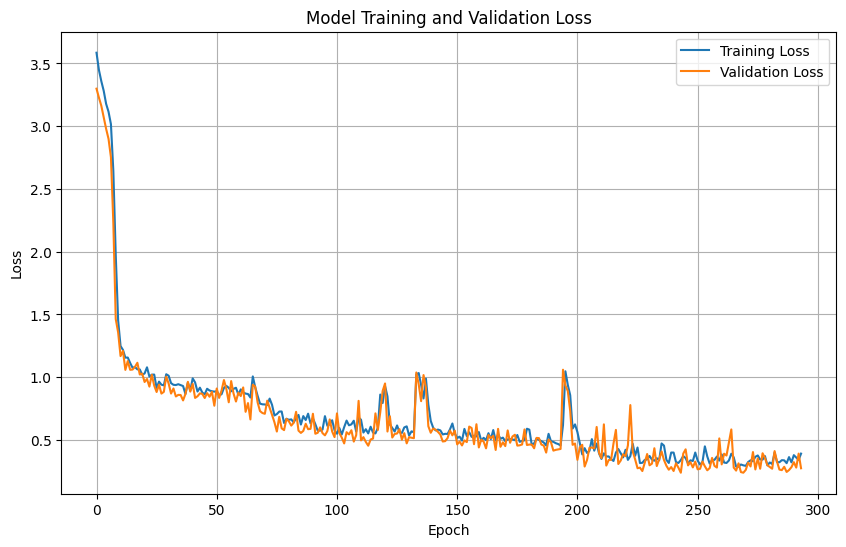

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


loss_values_from_third_epoch = history.history['loss'][1:]
val_loss_values = history.history['val_loss'][1:]

# Now plot starting from the 3rd epoch

plt.plot(loss_values_from_third_epoch, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

plt.savefig('Model Training and Validation Loss after theta static.png', format='png')
plt.show()

In [15]:
inference_time = end_time_inference - start_time_inference
print(f'Training Time: {training_time:.2f} seconds')
print(f'Inference Time: {inference_time:.4f} seconds per sample')

Training Time: 65.23 seconds
Inference Time: 0.1932 seconds per sample


In [22]:
model2 = load_model('model2_static_theta.keras',custom_objects={'custom_cost_function': custom_cost_function})


In [24]:


start_time_training = time.time()
history = model2.fit(X_train_nn2, y_train_nn2, epochs=400, verbose=1, validation_split=0.1, callbacks=[early_stopping_callback])
end_time_training = time.time()
training_time = end_time_training - start_time_training

start_time_inference = time.time()
y_pred_nn2 = model2.predict(X_test_nn2)
end_time_inference = time.time()



Epoch 1/400
71/71 [==============================] - 2s 9ms/step - loss: 35.7482 - val_loss: 3.0355
Epoch 2/400
71/71 [==============================] - 0s 3ms/step - loss: 2.8629 - val_loss: 2.6141
Epoch 3/400
71/71 [==============================] - 0s 3ms/step - loss: 2.7525 - val_loss: 2.5596
Epoch 4/400
71/71 [==============================] - 0s 3ms/step - loss: 2.7044 - val_loss: 2.5455
Epoch 5/400
71/71 [==============================] - 0s 3ms/step - loss: 2.6769 - val_loss: 2.5153
Epoch 6/400
71/71 [==============================] - 0s 3ms/step - loss: 2.6528 - val_loss: 2.4887
Epoch 7/400
71/71 [==============================] - 0s 3ms/step - loss: 2.6416 - val_loss: 2.4657
Epoch 8/400
71/71 [==============================] - 0s 3ms/step - loss: 2.6554 - val_loss: 2.6112
Epoch 9/400
71/71 [==============================] - 0s 3ms/step - loss: 2.6065 - val_loss: 2.4272
Epoch 10/400
71/71 [==============================] - 0s 3ms/step - loss: 2.5516 - val_loss: 2.4043
Epoch 11

71/71 [==============================] - 0s 3ms/step - loss: 1.3901 - val_loss: 1.3145
Epoch 84/400
71/71 [==============================] - 0s 3ms/step - loss: 1.3821 - val_loss: 1.3169
Epoch 85/400
71/71 [==============================] - 0s 3ms/step - loss: 1.3892 - val_loss: 1.3144
Epoch 86/400
71/71 [==============================] - 0s 3ms/step - loss: 1.3856 - val_loss: 1.3119
Epoch 87/400
71/71 [==============================] - 0s 3ms/step - loss: 1.4069 - val_loss: 1.3683
Epoch 88/400
71/71 [==============================] - 0s 3ms/step - loss: 1.4259 - val_loss: 1.3393
Epoch 89/400
71/71 [==============================] - 0s 3ms/step - loss: 1.3903 - val_loss: 1.3136
Epoch 90/400
71/71 [==============================] - 0s 3ms/step - loss: 1.3861 - val_loss: 1.3202
Epoch 91/400
71/71 [==============================] - 0s 3ms/step - loss: 1.3907 - val_loss: 1.3552
Epoch 92/400
71/71 [==============================] - 0s 3ms/step - loss: 1.3997 - val_loss: 1.3298
Epoch 93/400


14/14 [==============================] - 0s 1ms/step


In [18]:
np.save('y_test_nn2_after.npy', y_test_nn2)
np.save('y_pred_nn2_after.npy', y_pred_nn2) 

In [19]:
y_test_nn2.shape

(446, 5)

In [20]:
inference_time = end_time_inference - start_time_inference
print(f'Training Time: {training_time:.2f} seconds')
print(f'Inference Time: {inference_time:.4f} seconds per sample')

Training Time: 65.23 seconds
Inference Time: 0.1932 seconds per sample


Predictions: [[-169.63968    -224.58405     -42.83294       0.99841213   85.29424   ]
 [ -40.277023    -55.49437     -12.331777      2.3805594    20.260843  ]
 [ -85.1857     -106.758644    -23.48367      -3.9326096    43.33069   ]
 [-103.43735    -131.76572     -28.030363     -2.9362578    56.830204  ]
 [-148.60919    -194.92993     -38.30813      -0.804265     78.77177   ]]
Actual Outputs: [[ 39.2414473  112.241908    40.9570697  112.1522779    6.15896559]
 [-15.1346761  130.5742523  -15.854385   130.7872018    1.30282962]
 [-43.2773234  109.5770834  -43.0011119  109.3776441    2.87437344]
 [-43.9520199  135.890267   -43.9899584  136.2285029    3.59227943]
 [ -1.3659359  101.3608256   -1.4302622  101.0449194    5.26356459]]


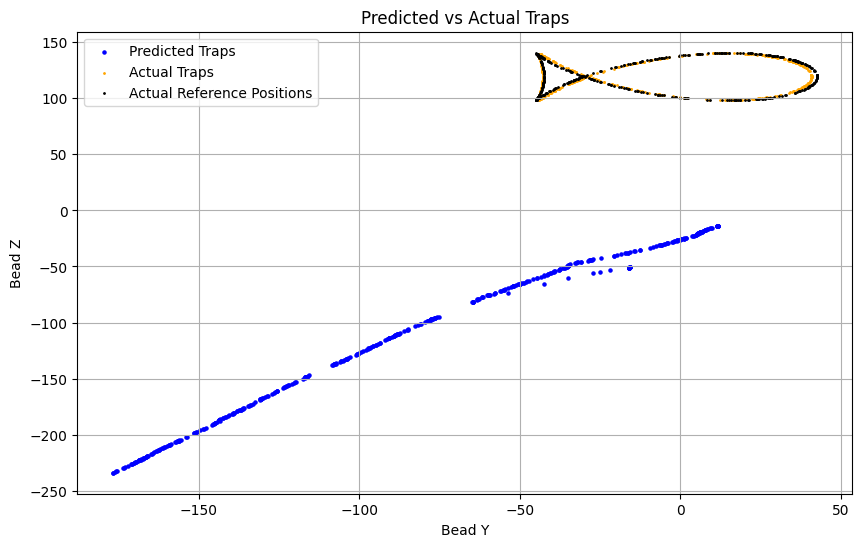

In [25]:

# Print predictions and actual outputs for comparison
print("Predictions:", y_pred_nn2[:5])
print("Actual Outputs:", y_test_nn2[:5])

# Plot the predictions vs reference positions
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_nn2[:, 0], y_pred_nn2[:, 1], color='blue', label='Predicted Traps', s=5)
plt.scatter(y_test_nn2[:, 0], y_test_nn2[:, 1], color='orange', label='Actual Traps',s=1)
plt.scatter(y_test_nn2[:, 2], y_test_nn2[:, 3], color='black', label='Actual Reference Positions',s=1)
# plt.scatter(lookup_table['measured_y'], lookup_table['measured_z'], color='pink', label='measured Positions')
plt.title('Predicted vs Actual Traps')
plt.xlabel('Bead Y')
plt.ylabel('Bead Z')
plt.legend()
plt.grid()

plt.savefig('Predicted vs Actual Traps.png', format='png')
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test_nn2[:, 0:2], y_pred_nn2[:, 0:2])
mae = mean_absolute_error(y_test_nn2[:, 0:2], y_pred_nn2[:, 0:2])
r2 = r2_score(y_test_nn2[:, 0:2], y_pred_nn2[:, 0:2])

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 33344.70074420653
Mean Absolute Error: 152.20209452981246
R-squared: -141.99486273163225


In [ ]:
y_test_nn2.shape

In [ ]:
input_for_model1 = np.concatenate([y_pred_nn2[:, 0:2], y_pred_nn2[:, 4:5]], axis=1)
input_for_model1 = input_for_model1.reshape((input_for_model1.shape[0], 1, input_for_model1.shape[1]))

# Predict using model1 with the final input
final_predictions = model1.predict(input_for_model1)
final_predictions

In [ ]:
final_predictions.shape

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(final_predictions[:, 0:2], y_test_nn2[:, 2:4])
mae = mean_absolute_error(final_predictions[:, 0:2], y_test_nn2[:, 2:4])
r2 = r2_score(final_predictions[:, 0:2], y_test_nn2[:, 2:4])

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


In [ ]:
plt.figure(figsize=(10, 6))
# plt.scatter(y_test_nn2[:, 0], y_test_nn2[:, 1], color='orange', label='original trap Positions')

plt.scatter(final_predictions[:, 0], final_predictions[:, 1], color='green', label='Predicted Measured Positions',s=1)
plt.scatter(y_pred_nn2[:, 0], y_pred_nn2[:, 1], color='blue', label='Predicted Trap Positions', s=3)
plt.scatter(y_test_nn2[:, 2], y_test_nn2[:, 3], color='black', label='Actual Reference Positions',s=1)
plt.title('Predicted Final Measured Positions')
plt.xlabel('Bead Y')
plt.ylabel('Bead Z')
plt.grid()
plt.legend()

plt.savefig('Predicted Final Measured Positions.png',format='png')
plt.show()

In [ ]:

# Convert final predictions to DataFrame and add theta
final_predictions_df = pd.DataFrame(final_predictions, columns=['measured_y', 'measured_z', 'theta'])

# Sort final predictions by theta
final_predictions_sorted = final_predictions_df.sort_values(by=['theta','measured_y','measured_z'], ascending=True)

# Plotting predictions vs actual outputs sorted by theta
plt.figure(figsize=(10, 6))
plt.scatter(lookup_table['theta'], lookup_table['measured_y'], color='orange', label='Reference Positions')
plt.scatter(final_predictions_sorted['theta'], final_predictions_sorted['measured_y'], color='blue', label='Predicted Measured Positions')
plt.xlabel('Theta')
plt.ylabel('Bead Y')
plt.title('Bead Y vs Theta for Predicted Final Measured Positions and Reference positions')

plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(lookup_table['theta'], lookup_table['measured_z'], color='orange', label='Reference Positions')
plt.scatter(final_predictions_sorted['theta'], final_predictions_sorted['measured_z'], color='blue', label='Predicted Measured Positions')
plt.xlabel('Theta')
plt.ylabel('Bead Z')
plt.title('Bead Z vs Theta for Predicted Final Measured Positions vs Reference positions')

plt.legend()
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(final_predictions_sorted['measured_y'], final_predictions_sorted['measured_z'], color='green', label='Predicted measured Positions')


In [ ]:
# model2.save('model2_static_theta.keras')

In [ ]:
#trying out the models on sampled random data

In [ ]:
sampled_df = data.sample(n=1000, random_state=42)
sample_input =sampled_df[['traps_y','traps_z','theta']].values


In [ ]:
sampled_df = sample_input.reshape((sample_input.shape[0], 1, sample_input.shape[1]))

model1predictions = model1.predict(sampled_df)
model1predictions.shape

In [ ]:
model1predictions_df = pd.DataFrame(model1predictions)
sample_input_model2 =model1predictions_df[[0,1,2]].values
sampledmodel2_df = sample_input_model2.reshape((sample_input_model2.shape[0], 1, sample_input_model2.shape[1]))


In [ ]:
model2predictions = model2.predict(sampledmodel2_df)
model2predictions

In [ ]:
model2predictions_df = pd.DataFrame(model2predictions)
sample_input_model1 =model2predictions_df[[0,1,2]].values
finalpredictions_df = sample_input_model1.reshape((sample_input_model1.shape[0], 1, sample_input_model1.shape[1]))


In [ ]:
finalpredictions = model1.predict(finalpredictions_df)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(model1predictions[:,0], model1predictions[:,1], label='model1')
plt.scatter(model2predictions[:,0], model2predictions[:,1],label='model2')  

plt.scatter(finalpredictions[:,0], finalpredictions[:,1], label='model1')

plt.xlabel('Bead_y') 
plt.ylabel('Bead_z')  
plt.title('Random Sample of 1000 Points')
plt.legend()
plt.show()


In [ ]:
model2.summary

In [ ]:
# List all layers
for layer in model2.layers:
    print(layer.name, layer.input_shape, layer.output_shape, layer.count_params())


In [ ]:
# Get weights of a specific layer
layer_weights = model2.layers[0].get_weights()
print(layer_weights)


In [16]:
aftertheta = np.abs(y_test_nn2 - y_pred_nn2)[:, 0]  # Replace with actual predictions

# Save the errors to .npy files
np.save('aftertheta.npy', aftertheta)

In [17]:
y_test_nn2

array([[ 3.92414473e+01,  1.12241908e+02,  4.09570697e+01,
         1.12152278e+02,  6.15896559e+00],
       [-1.51346761e+01,  1.30574252e+02, -1.58543850e+01,
         1.30787202e+02,  1.30282962e+00],
       [-4.32773234e+01,  1.09577083e+02, -4.30011119e+01,
         1.09377644e+02,  2.87437344e+00],
       ...,
       [-4.34088391e+01,  1.39072810e+02, -4.45981047e+01,
         1.39492754e+02,  4.01353168e+00],
       [ 4.07710896e+01,  1.20375449e+02,  4.24723009e+01,
         1.20387245e+02,  6.26005530e-02],
       [ 3.82941749e+01,  1.10419994e+02,  4.00193338e+01,
         1.10305188e+02,  6.11086369e+00]])